KELOMPOK 8 - AI TUGAS 2

INDRA DEVA AJI ZAKARIA

RAHMATIA PRIMADIATI

ZAKIA SYAHRINI


Diberikan file restoran.xls berupa himpunan data 100 restoran yang ada di kota A dengan dua atribut: Kualitas pelayanan (bilangan real 1-100) dan kualitas makanan (bilangan real 1-10). Bangunlah sebuah sistem berbasis fuzzy logic untuk memilih 10 restoran terbaik di kota A. Sistem membaca masukan file restoran.xls dan mengeluarkan output berupa sebuah file peringkat.xls yang berisi satu vektor kolom berisi 10 baris angka bernilai integer (bilangan bulat) yang menyatakan nomor baris/record id restoran (1-100) pada file restoran.xls.


HAL YANG DAPAT DIOBSERVASI:

jumlah dan nama linguistik setiap input

bentuk dan batas fungsi keanggotaan input

aturan inferensi

metode defuzzifikasi

bentuk dan batas fungsi keanggotaan output

HAL YANG HARUS DIBANGUN

*   membaca file
*   inferensi
*   fuzzifikasi
*   defuzzifikasi




In [ ]:
#download data dari sample excel
!gdown --id 1KAB5SYo6fLzv4bYmpadclcYswfQCMAph

Downloading...
From: https://drive.google.com/uc?id=1KAB5SYo6fLzv4bYmpadclcYswfQCMAph
To: /content/restoran.xlsx
100% 10.5k/10.5k [00:00<00:00, 9.16MB/s]


In [ ]:
import numpy as np
#import plot library
import matplotlib.pyplot as plt
#import data dari sample data
import pandas as pd

data = pd.read_excel("restoran.xlsx")

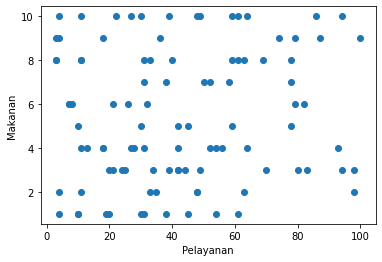

In [ ]:
#cek data plot
plt.scatter(data.pelayanan, data.makanan)
plt.xlabel("Pelayanan")
plt.ylabel("Makanan")
plt.show()

In [ ]:
#show data pelayanan dari excel
n = 100
data_pelayanan = []
series = data["pelayanan"]
data_pelayanan.append(series.head(n = n))
data_pelayanan

[0     58
 1     54
 2     98
 3     52
 4     11
       ..
 95    30
 96    25
 97    27
 98     8
 99    11
 Name: pelayanan, Length: 100, dtype: int64]

In [ ]:
#show data makanan dari excel
n = 100
data_makanan = []
series2 = data["makanan"]
data_makanan.append(series2.head(n = n))
data_makanan

[0      7
 1      1
 2      2
 3      4
 4      4
       ..
 95     1
 96     3
 97    10
 98     6
 99     8
 Name: makanan, Length: 100, dtype: int64]

In [ ]:
#fungsi gauss
def fuzzy_linguistik(x, point):
    return np.exp(-((x-point[0])**2)/2*(point[1]**2))

In [ ]:
#buat grafik
def plot_lgtik(point, color, label='', min=0, max=1):
   
    x=np.arange(min, max, 0.1)
    y=fuzzy_linguistik(x, point)
    plt.plot(x,y,color,label=label)

def plot_membership( membership, min=0, max=1):
    color = ['r','g','b','y']

    i = 0
    for lgtik in membership:
        plot_lgtik( membership[lgtik], color[i], lgtik, min=min, max=max)
        i = i + 1
    plt.title('Grafik Membership')
    plt.legend(loc = 3)
    plt.show()

In [ ]:
def fuzzy_membership(x, membership):
    result = {}

    for lgtik in membership:
        result[ lgtik ] = fuzzy_linguistik(x, membership[ lgtik ])
    return result

def fuzzyfikasi(x, list_membership):
    result = []

    for i in range( len( list_membership )):
        result.append( fuzzy_membership( x[i], list_membership[i] ))

    return result

In [ ]:
#inferensi
def inference(x_fuzzy, rule):
    result = {}

    for r1, l1 in x_fuzzy[ 0 ].items():
        for r2, l2 in x_fuzzy[ 1 ].items():
            h, min_value = (r1, r2), min(l1, l2)

            current_value = result.get( rule[h], 0 )

            result[ rule[ h ]] = max( min_value, current_value )
    return result

In [ ]:
#defuzzyfikasi
def defuzz_sugeno( x_infer, memberhsip ):
    num, den = 0,0

    for lgtik in memberhsip:
        num += x_infer[ lgtik ] * memberhsip[ lgtik ]
        den += x_infer[ lgtik ]

    return num / den

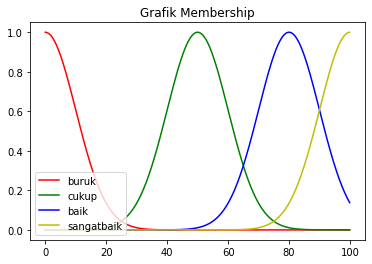

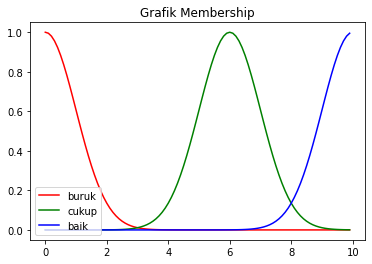

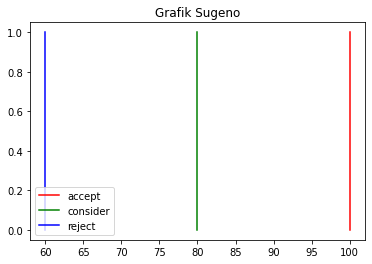

In [ ]:
#membership

pelayanan = {
    'buruk'      : [ 0, 0.1 ],
    'cukup'      : [ 50, 0.1 ],
    'baik'       : [ 80, 0.1 ],
    'sangatbaik' : [ 100, 0.1 ],
}


makanan = {
    'buruk'      : [ 0, 1 ],
    'cukup'      : [ 6, 1 ],
    'baik'       : [ 10, 1 ],
}

plot_membership( pelayanan, max = 100 )
plot_membership( makanan, max = 10 )

rule = {
    ( 'buruk', 'buruk' )        : 'reject',
    ( 'buruk', 'cukup' )        : 'reject',
    ( 'buruk', 'baik' )         : 'reject',
    ( 'cukup', 'buruk' )        : 'reject',
    ( 'cukup', 'cukup' )        : 'reject',
    ( 'cukup', 'baik' )         : 'reject',
    ( 'baik', 'buruk' )         : 'reject',
    ( 'baik', 'cukup' )         : 'consider',
    ( 'baik', 'baik' )          : 'accept',
    ( 'sangatbaik', 'buruk' )   : 'reject',
    ( 'sangatbaik', 'cukup' )   : 'consider',
    ( 'sangatbaik', 'baik' )    : 'accept',
}

accept_sugeno = { 'accept' : 100, 'consider' : 80, 'reject' : 60 }

colors = 'rgb'
for key, val in accept_sugeno.items():
    plt.plot([ val, val ], [0, 1], colors[ 0 ], label=key)
    colors = colors[ 1: ]
    plt.title( 'Grafik Sugeno' )
plt.legend(loc = 3)
plt.show()

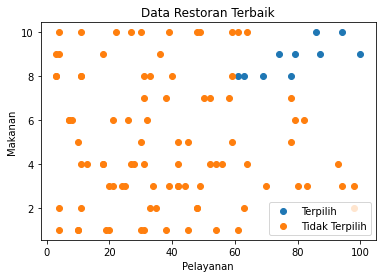

In [ ]:
score = []
for x in data.drop('id', axis=1).values:
    x_fuzzy = fuzzyfikasi(x, [pelayanan, makanan])
    x_infer = inference(x_fuzzy, rule)
    x_defuz = defuzz_sugeno( x_infer, accept_sugeno)
    score.append( x_defuz )

data[ 'Score' ] = score

selected_restourant = data.sort_values(by = 'Score', ascending = False)[ : 10 ]
not_selected = data.drop( selected_restourant.index )

plt.scatter( selected_restourant.pelayanan,
             selected_restourant.makanan,
             label = 'Terpilih' )
plt.scatter( not_selected.pelayanan,
             not_selected.makanan,
             label = 'Tidak Terpilih' )

plt.xlabel( 'Pelayanan' )
plt.ylabel( 'Makanan' )
plt.title( 'Data Restoran Terbaik' )
plt.legend( loc = 'lower right' )

plt.show()

In [ ]:
x_fuzzy[0]

{'baik': 4.5879624871392754e-11,
 'buruk': 0.5460744266397094,
 'cukup': 0.000497955421503273,
 'sangatbaik': 6.306189893986358e-18}

In [ ]:
x_fuzzy[1]

{'baik': 0.1353352832366127,
 'buruk': 1.2664165549094176e-14,
 'cukup': 0.1353352832366127}

In [ ]:
x_infer

{'accept': 4.5879624871392754e-11,
 'consider': 4.5879624871392754e-11,
 'reject': 0.1353352832366127}

In [ ]:
x_defuz

60.00000002034043

In [ ]:
selected_restourant

,id,pelayanan,makanan,Score
41,42,94,10,99.988979
68,69,86,10,99.918697
23,24,100,9,99.640037
78,79,87,9,99.572056
21,22,79,9,98.705244
30,31,74,9,96.337691
69,70,78,8,87.951088
94,95,63,8,80.000000
6,7,61,8,80.000000
82,83,69,8,80.000000
